In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("../output/stream/syntentic_run_small_1/small_dataset_0_q63.json", 'r') as f:
  data = json.load(f) 

In [3]:
data

{'frame_pixel_num': 2073600,
 'i_frame_num': 4,
 'p_frame_num': 96,
 'ave_i_frame_bpp': 0.3407204861111111,
 'ave_i_frame_psnr': 40.96343568138633,
 'ave_i_frame_msssim': 0.0,
 'frame_bpp': [0.32293595679012344,
  0.17635030864197532,
  0.011161265432098765,
  0.1366087962962963,
  0.011755401234567902,
  0.03732638888888889,
  0.011782407407407408,
  0.02665895061728395,
  0.012249228395061729,
  0.12838734567901233,
  0.013113425925925926,
  0.03245756172839506,
  0.013175154320987655,
  0.028433641975308642,
  0.01290895061728395,
  0.02766975308641975,
  0.013526234567901235,
  0.06851466049382716,
  0.012743055555555556,
  0.03011574074074074,
  0.0125,
  0.027565586419753086,
  0.012156635802469135,
  0.024324845679012344,
  0.011238425925925926,
  0.3305439814814815,
  0.1837962962962963,
  0.09298225308641975,
  0.011431327160493826,
  0.07167438271604938,
  0.011898148148148149,
  0.025189043209876544,
  0.013287037037037036,
  0.12430941358024691,
  0.012766203703703703,
  0.

In [4]:
i_bpp = []
p_bpp = []

for idx, type in enumerate(data['frame_type']):
  if type == 0:
    i_bpp.append(data['frame_bpp'][idx])
  else:
    p_bpp.append(data['frame_bpp'][idx])

i_mean = sum(i_bpp)/len(i_bpp)
p_mean = sum(p_bpp)/len(p_bpp)
savings_coeff = i_mean/p_mean

print("Mean I BPP: {} Mean P BPP: {} Savings Coeff: {}".format(i_mean, p_mean, savings_coeff))

Mean I BPP: 0.34072048611111116 Mean P BPP: 0.0768313962834362 Savings Coeff: 4.434651751663738


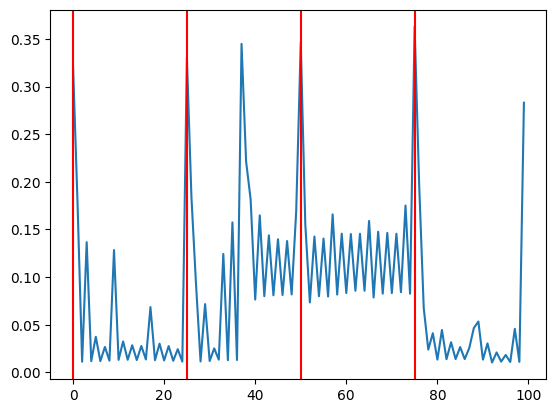

In [5]:
f_types = np.array(data['frame_type'])


plt.plot(data['frame_bpp'])
for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

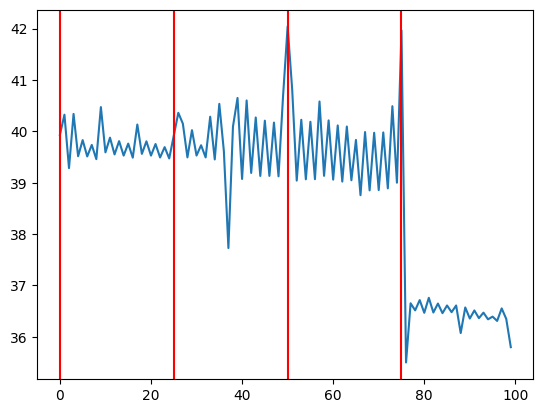

In [6]:
plt.plot(data['frame_psnr'])
for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

### Straight video

In [7]:
with open("../output/stream/straight_no_intra_1/straight_dataset_0_q63.json", 'r') as f:
  straight_data = json.load(f) 

with open("../output/stream/straight_no_intra_no_refresh_1/straight_dataset_0_q63.json", 'r') as f:
  straight_data_n = json.load(f) 

with open("../output/stream/straight_with_intra_32_1/straight_dataset_0_q63.json", 'r') as f:
  straight_data_i = json.load(f) 

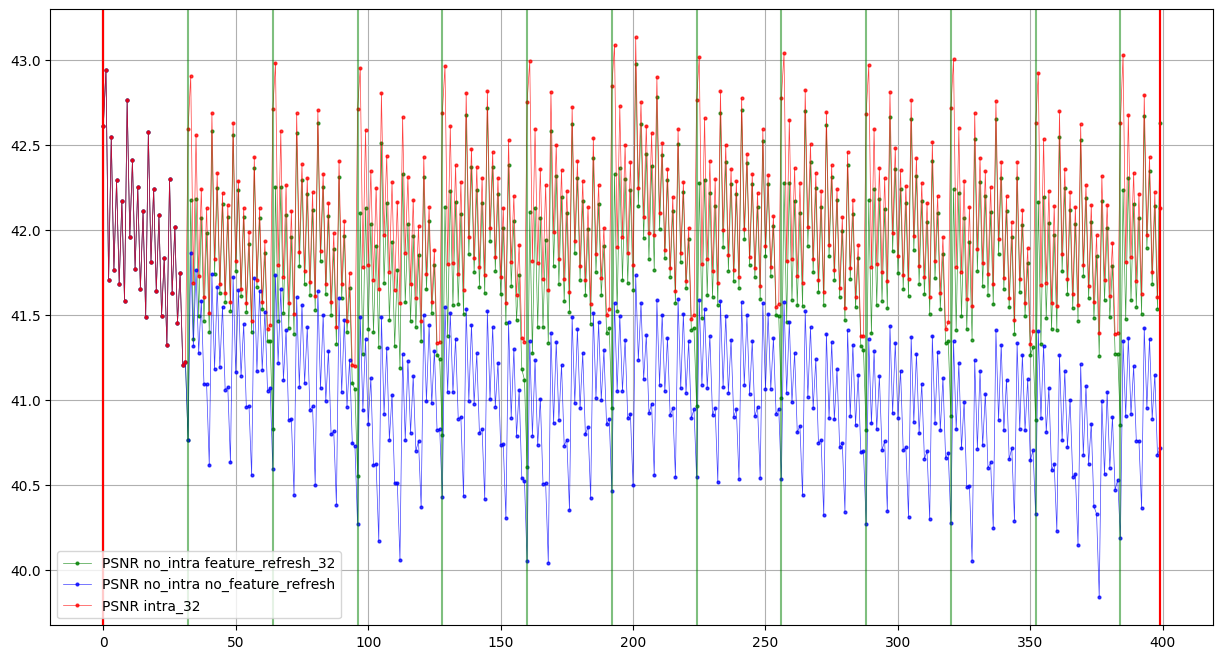

In [8]:
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(straight_data['frame_psnr'], label = "PSNR no_intra feature_refresh_32", marker='o', linewidth=0.5, markersize=2, c = 'g', alpha=0.75)
plt.plot(straight_data_n['frame_psnr'], label = "PSNR no_intra no_feature_refresh", marker='o', linewidth=0.5, markersize=2, c = 'b', alpha=0.75)
plt.plot(straight_data_i['frame_psnr'], label = "PSNR intra_32", marker='o', linewidth=0.5, markersize=2, c = 'r', alpha=0.75)
plt.legend()

f_types = np.array(straight_data['frame_type'])
for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

for idx in np.arange(0, len(straight_data['frame_psnr']), 32):
  plt.axvline(x=idx, color='g', alpha=0.5)

for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

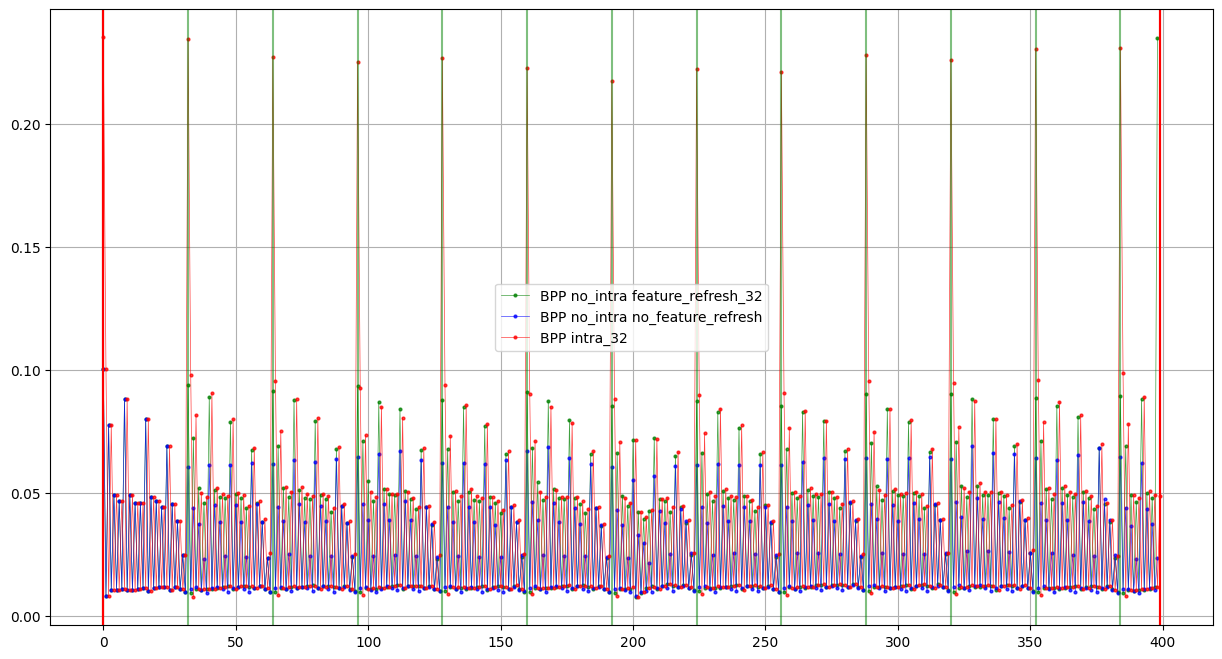

In [9]:
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(straight_data['frame_bpp'][1:], label = "BPP no_intra feature_refresh_32", marker='o', linewidth=0.5, markersize=2, c = 'g', alpha=0.75)
plt.plot(straight_data_n['frame_bpp'][1:], label = "BPP no_intra no_feature_refresh", marker='o', linewidth=0.5, markersize=2, c = 'b', alpha=0.75)
plt.plot(straight_data_i['frame_bpp'], label = "BPP intra_32", marker='o', linewidth=0.5, markersize=2, c = 'r', alpha=0.75)
plt.legend()

f_types = np.array(straight_data['frame_type'])
for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

for idx in np.arange(0, len(straight_data['frame_bpp']), 32):
  plt.axvline(x=idx, color='g', alpha=0.5)

for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

### Frequent switch video

In [10]:
with open("../output/stream/frequent_no_intra_1/frequent_dataset_0_q63.json", 'r') as f:
  freq_data = json.load(f) 

with open("../output/stream/frequent_no_intra_no_refresh_1/frequent_dataset_0_q63.json", 'r') as f:
  freq_data_n = json.load(f) 

with open("../output/stream/frequent_with_intra_32_1/frequent_dataset_0_q63.json", 'r') as f:
  freq_data_i = json.load(f)

with open("../media/syntetic/frequent_dataset_0/reference_points.json", 'r') as f:
  ref_points = json.load(f)
  ref_points = [idx for idx in ref_points if idx < len(freq_data['frame_psnr'])]

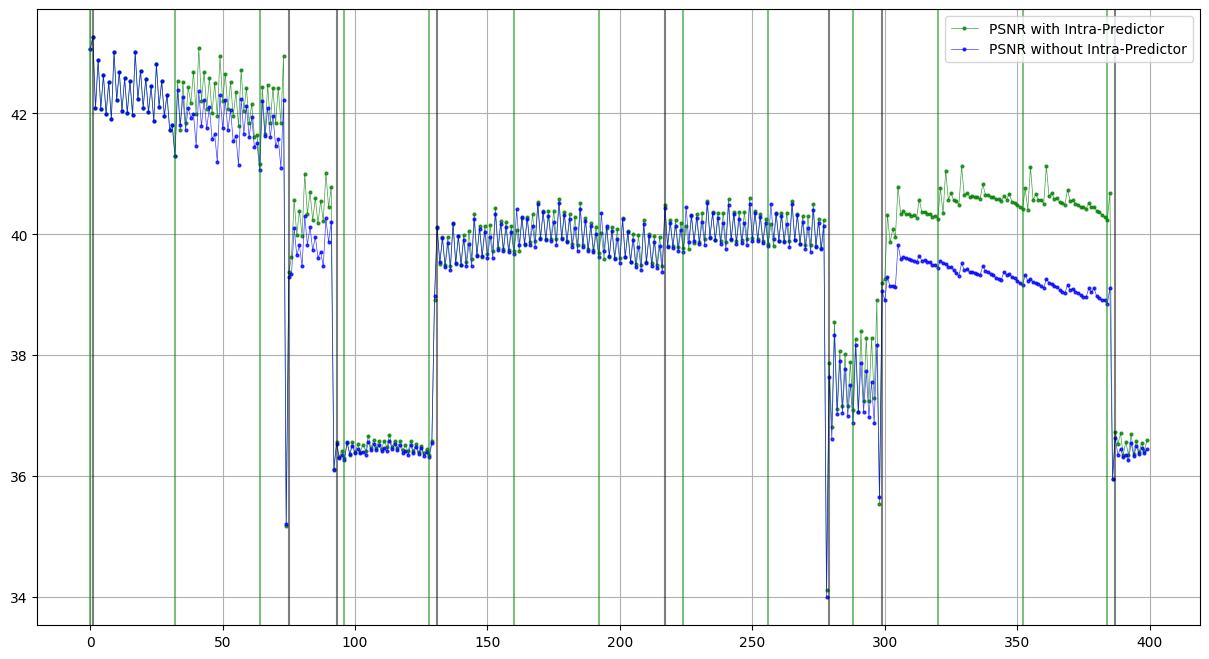

In [22]:
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(freq_data['frame_psnr'], label = "PSNR with Intra-Predictor", marker='o', linewidth=0.5, markersize=2, c = 'g', alpha = 0.75)
plt.plot(freq_data_n['frame_psnr'], label = "PSNR without Intra-Predictor", marker='o', linewidth=0.5, markersize=2, c = 'b', alpha = 0.75)
# plt.plot(freq_data_i['frame_psnr'], label = "PSNR", marker='o', linewidth=0.5, markersize=2, c = 'r', alpha = 0.75)
plt.legend()

# f_types = np.array(freq_data['frame_type'])
# for idx in np.argwhere(f_types == 0):
#   plt.axvline(x=idx, color='r')

for idx in np.arange(0, len(freq_data['frame_psnr']), 32):
  plt.axvline(x=idx, color='g', alpha=0.5)

for idx in ref_points:
  plt.axvline(x=idx, color='k', alpha=0.5)


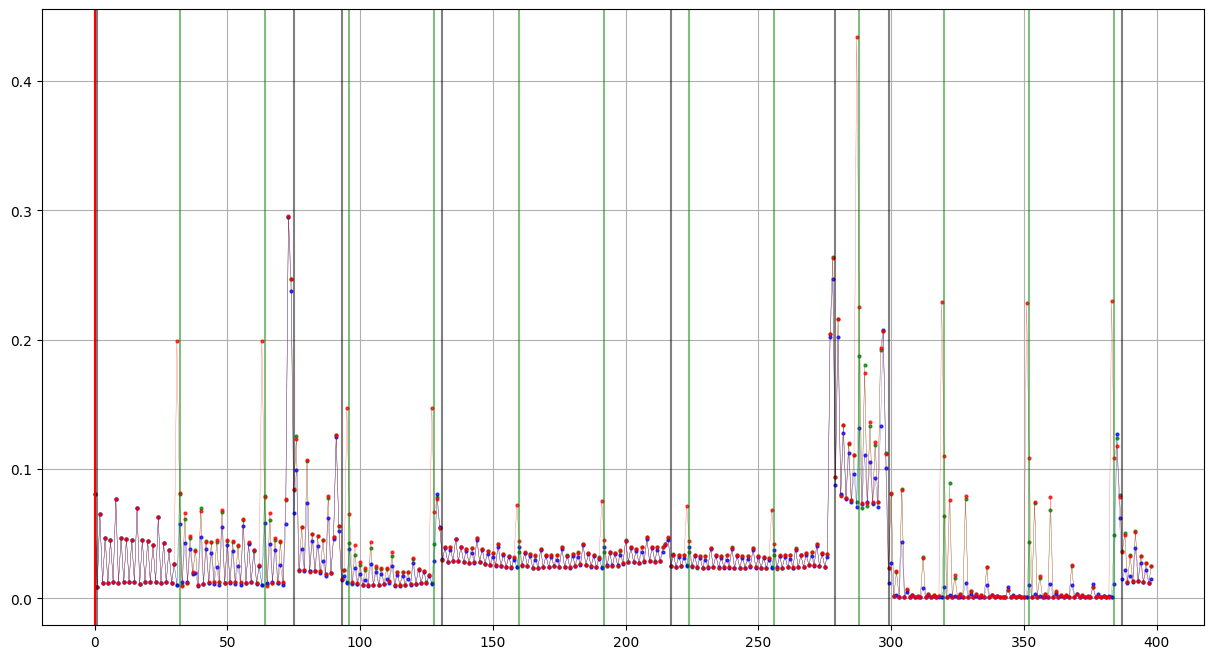

In [20]:
plt.figure(figsize=(15, 8))
plt.grid(True)
plt.plot(freq_data['frame_bpp'][1:], label = "BPP", marker='o', linewidth=0.2, markersize=2, c = 'g', alpha = 0.75)
plt.plot(freq_data_n['frame_bpp'][1:], label = "BPP", marker='o', linewidth=0.2, markersize=2, c = 'b', alpha = 0.75)
plt.plot(freq_data_i['frame_bpp'][1:], label = "BPP", marker='o', linewidth=0.2, markersize=2, c = 'r', alpha = 0.75)

for idx in np.arange(0, len(freq_data['frame_bpp']), 32):
  plt.axvline(x=idx, color='g', alpha=0.5)

for idx in np.argwhere(f_types == 0):
  plt.axvline(x=idx, color='r')

for idx in ref_points:
  plt.axvline(x=idx, color='k', alpha=0.5)

In [13]:
np.sum(np.array(freq_data['frame_bpp'][1:]) - np.array(freq_data_n['frame_bpp'][1:])) * 1920 * 1080 / 400 / 1024

8.40859375

In [14]:
np.mean(np.array(freq_data_i['frame_psnr'][1:]))

39.98865820067695

In [15]:
np.mean(np.array(freq_data_i['frame_psnr'][1:]) - np.array(freq_data['frame_psnr'][1:]))

0.0586007165793167

In [16]:
np.mean(np.array(freq_data['frame_psnr'][1:]) - np.array(freq_data_n['frame_psnr'][1:]))

0.36702408947501153